<a href="https://colab.research.google.com/github/atanuchaudhury/DataScience/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
logi=pd.read_csv("churn.csv")  #LOADING THE DATASET

In [7]:
#customer churn dataset
logi.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
print (logi) #DATASET PRINTED

      customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043 rows x 21 columns]


In [ ]:
#regression model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression #IMPORTING LINEAR REGRESSION MODEL
from sklearn.model_selection import train_test_split #IMPORTING TEST TRAIN MODEL
y=logi[['MonthlyCharges']]
x=logi[['tenure']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=0) #SPLITING DATSET FOR TEST AND TRAIN SETS
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((5634, 1), (5634, 1), (1409, 1), (1409, 1))

In [ ]:
regressor=LinearRegression() #APPLYING THE REGRESSION MODEL TO THE TRAINING SETS
regressor.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=regressor.predict(x_test) #PREDICTING FROM THE TEST SETS
from sklearn.metrics import mean_squared_error 
np.sqrt(mean_squared_error(y_test,y_pred)) #CALCULATING THE ACCURACY

29.328356310893557

# # classification model (deceision tree) 


In [ ]:
x=logi[['tenure']]
y=logi[['Churn']]
from sklearn.tree import DecisionTreeClassifier #CLASSIFIER MODEL IMPORTED
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=0) #SPLITING THE DATASET INTO TEST AND TRAIN SETS

In [ ]:
my_tree=DecisionTreeClassifier() # APPLYING CLASSIFIER MODEL
my_tree.fit(x_train,y_train) # TRAINNING THE DATASET

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred=my_tree.predict(x_test) #PREDICTING FROM THE TEST SETS

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred) # CONFUSION MATRIX IMPORTED AND APPLIED

array([[965,  76],
       [281,  87]])

EDA ANALYSIS


Text(0.5, 1.0, 'Distribution of Internet servers')

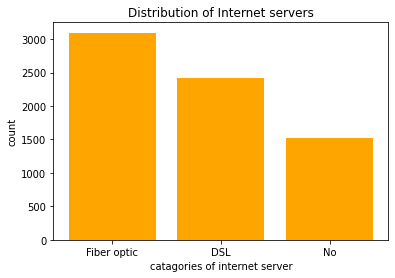

In [ ]:
from matplotlib import pyplot as plt
plt.bar(logi['InternetService'].value_counts().keys().tolist(),logi['InternetService'].value_counts().tolist(),color='orange')
plt.xlabel('catagories of internet server')
plt.ylabel('count')
plt.title('Distribution of Internet servers')

(array([862., 376., 374., 242., 215., 302., 179., 257., 134., 175., 252.,
        129., 209., 133., 153., 174., 120., 200., 112., 142., 198., 148.,
        202., 145., 127., 222., 152., 263., 195., 651.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ,
        26.4, 28.8, 31.2, 33.6, 36. , 38.4, 40.8, 43.2, 45.6, 48. , 50.4,
        52.8, 55.2, 57.6, 60. , 62.4, 64.8, 67.2, 69.6, 72. ]),
 <a list of 30 Patch objects>)

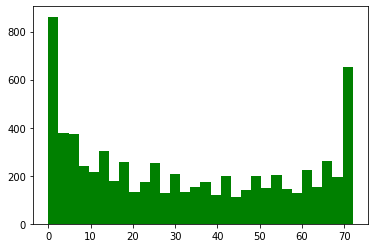

In [ ]:
plt.hist(logi['tenure'],bins=30,color='green')

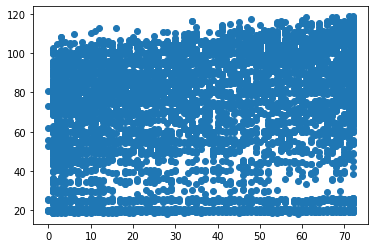

In [ ]:
plt.scatter(x=logi['tenure'],y=logi['MonthlyCharges'])

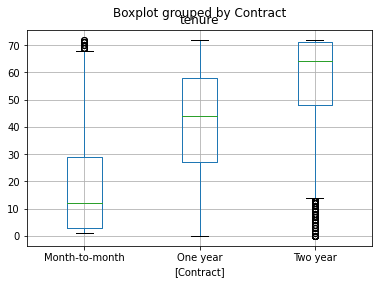

In [ ]:
logi.boxplot(column=['tenure'],by=['Contract'])